from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch
import cv2
import json
#import imgaug as ia
#from imgaug import augmenters as iaa

#from torchvision.transforms import ToPILImage
import torch.nn as nn
import torch.utils as utils
import torch.nn.init as init
import torch.utils.data as data
import torchvision.utils as v_utils
import torchvision.datasets as dset
import torchvision.transforms as transforms
import os


In [15]:
import torch.nn as nn
import torch.nn.init as init
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Function
import torch.utils.data as data
import torch
import cv2
import numpy as np
import time
import pandas as pd
import os.path as osp
from itertools import product as product
from math import sqrt as sqrt
from PIL import Image
import math

import matplotlib.pyplot as plt


img shape: (1009, 1345, 3)


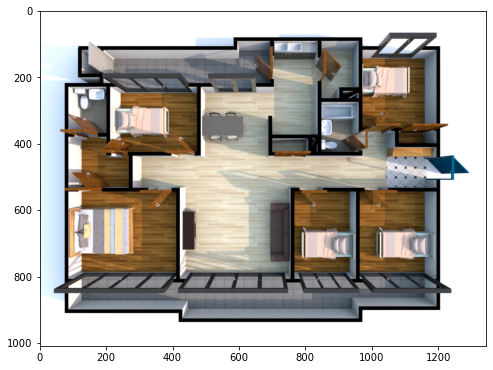

In [18]:

img = cv2.imread('/Users/reejungkim/Documents/Git/ImgProcessor/img/to_label/170_423/img.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

img shape: (1009, 1345, 3)


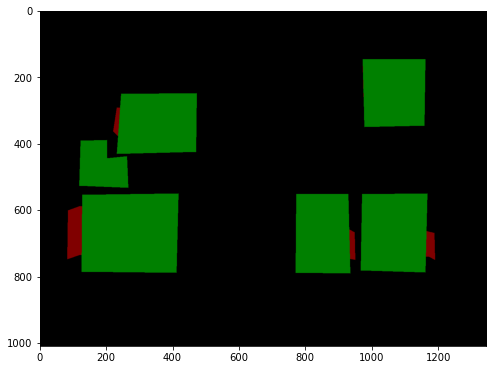

In [17]:


img = cv2.imread('/Users/reejungkim/Documents/Git/ImgProcessor/img/to_label/170_423/label.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [2]:
import json
import os

with open('/Users/reejungkim/Documents/Git/ImgProcessor/img/to_label/421234_89068.json',
          encoding='utf-8-sig') as f:
    data = json.load(f)

In [3]:
data.keys()

dict_keys(['version', 'flags', 'shapes', 'imagePath', 'imageData', 'imageHeight', 'imageWidth'])